In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid_df = pd.read_csv('covid19 analysis.csv')
happiness_df = pd.read_csv('worldwide_happiness_report.csv')


In [3]:
covid_country_df = covid_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_country_grouped = covid_country_df.groupby('Country/Region').sum()
covid_country_grouped['Total Confirmed'] = covid_country_grouped.iloc[:, -1]
covid_country_grouped = covid_country_grouped[['Total Confirmed']].reset_index()
covid_country_grouped.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [4]:
happiness_df_renamed = happiness_df.rename(columns={'Country or region': 'Country'})


In [5]:
merged_df = pd.merge(happiness_df_renamed, covid_country_grouped, on='Country', how='inner')
merged_df.head()


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Total Confirmed
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,9892
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,27941
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,13915
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2695
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,122620


C:\Users\hp\AppData\Local\Temp\ipykernel_4988\1391952332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country', y='Total Confirmed', palette='Reds_r')


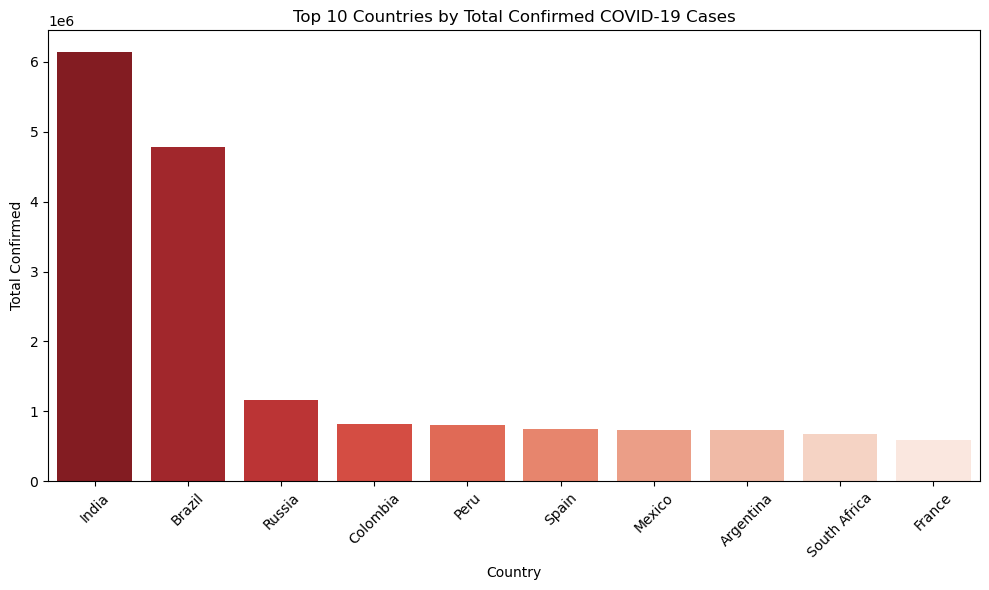

In [10]:
top10 = merged_df.sort_values(by='Total Confirmed', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Country', y='Total Confirmed', palette='Reds_r')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


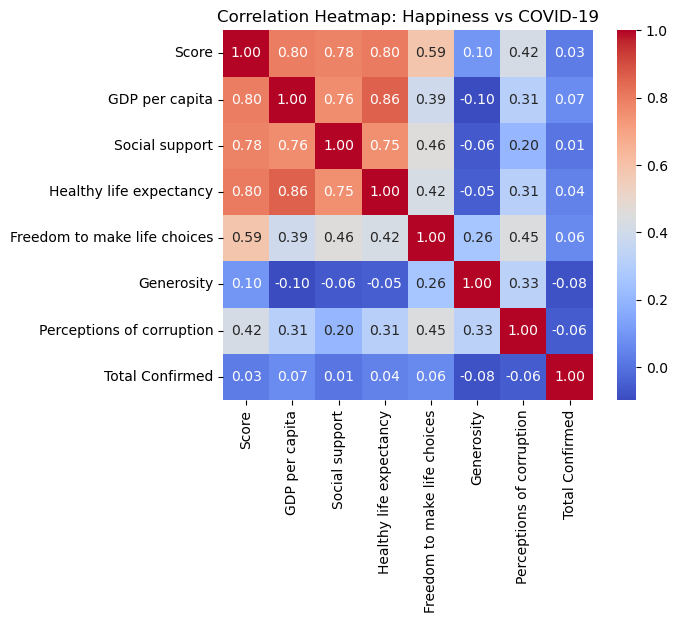

In [20]:
corr_cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Total Confirmed']

sns.heatmap(merged_df[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True) # blue means neg and red means positive
plt.title('Correlation Heatmap: Happiness vs COVID-19')
plt.xticks(rotation=90)
plt.show()

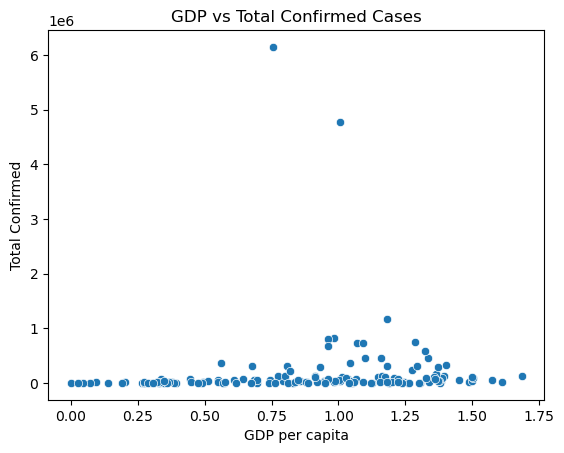

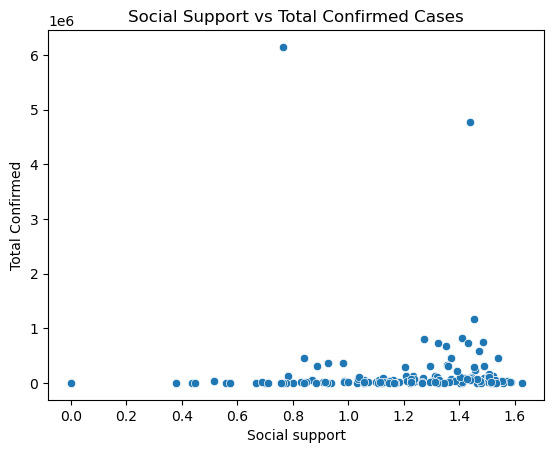

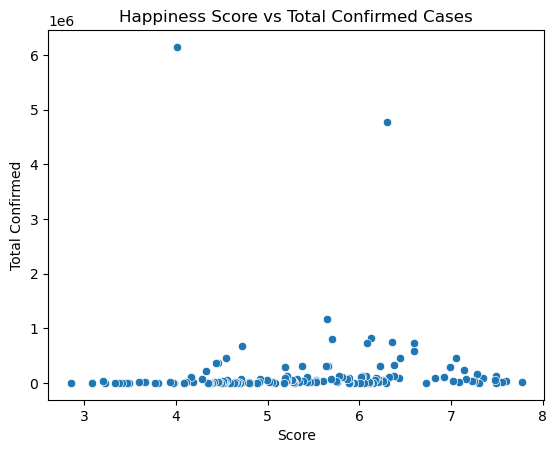

In [21]:
sns.scatterplot(data=merged_df, x='GDP per capita', y='Total Confirmed')
plt.title('GDP vs Total Confirmed Cases')
plt.show()

sns.scatterplot(data=merged_df, x='Social support', y='Total Confirmed')
plt.title('Social Support vs Total Confirmed Cases')
plt.show()

sns.scatterplot(data=merged_df, x='Score', y='Total Confirmed')
plt.title('Happiness Score vs Total Confirmed Cases')
plt.show()
